In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [ ]:
y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [ ]:
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='elu', padding='same')(inputs)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='elu', padding='same')(x)

x = layers.Conv2D(32, 3, activation='elu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='elu', padding='same')(x)
x = layers.MaxPool2D((3,3))(x)

#Inception1


conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)

conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_2 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(conv_2)

conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)

conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(x)

x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)

# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)

# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2

conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(x)
conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='relu')(conv_2)

conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(x)

x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
# conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
# conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
# conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
# conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception3
conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_11 = layers.Conv2D(32, (1,3), padding='same', activation='elu')(conv_1)

conv_12 = layers.Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)

conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_21 = layers.Conv2D(32, (1,3), padding='same', activation='relu')(conv_2)

conv_22 = layers.Conv2D(32, (3,1), padding='same', activation='elu')(conv_2)

conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(x)

x = layers.concatenate([conv_11,conv_12,conv_3,conv_4,conv_21,conv_22], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)
# conv_11 = layers.Conv2D(32, (1,3), padding='same', activation='elu')(conv_1)

# conv_12 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_21 = layers.Conv2D(32, (1,3), padding='same', activation='elu')(conv_2)

# conv_22 = layers.Conv2D(32, (3,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)

# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#end

# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)



# x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.AveragePooling2D(4)(x)
x=layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(100, activation='softmax')(x)

inception_net_model = keras.Model(inputs, outputs)

In [ ]:
inception_net_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 32, 32, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 32, 32, 32)   9248        conv2d_68[0][0]                  
__________________________________________________________________________________________________
conv2d_70 (Conv2D)              (None, 32, 32, 32)   9248        conv2d_69[0][0]                  
_______________________________________________________________________________________

In [ ]:
%load_ext tensorboard
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='tensorboard',histogram_freq=1)
inception_net_model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=0.00000001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='inception_adam_noreg.hdf5',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
# inception_net_model.fit(x_train,y_proc,batch_size=128,validation_data=(x_test,y_test_proc),epochs=100,callbacks=[callback,model_checkpoint_callback])
output=inception_net_model.fit_generator(datagen.flow(x_train,y_proc,batch_size = 200), epochs = 100, validation_data = (x_test,y_test_proc),callbacks = [tensor_board,callback,model_checkpoint_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
250/250 [==============================] - 35s 138ms/step - loss: 4.1460 - acc: 0.0559 - val_loss: 3.7425 - val_acc: 0.1170
Epoch 2/100
250/250 [==============================] - 34s 135ms/step - loss: 3.5118 - acc: 0.1570 - val_loss: 3.2775 - val_acc: 0.1980
Epoch 3/100
250/250 [==============================] - 34s 136ms/step - loss: 3.1555 - acc: 0.2171 - val_loss: 3.0524 - val_acc: 0.2439
Epoch 4/100
250/250 [==============================] - 34s 136ms/step - loss: 2.9080 - acc: 0.2634 - val_loss: 2.7859 - val_acc: 0.2899
Epoch 5/100
250/250 [==============================] - 34s 136ms/step - loss: 2.7179 - acc: 0.3005 - val_loss: 2.6791 - val_acc: 0.3180
Epoch 6/100
250/250 [==============================] - 34s 136ms/step - loss: 2.5235 - acc: 0.3401 - val_loss: 2.5321 - val_acc: 0.3385
Epoch 7/100
250/250 [==============================] - 34s 135ms/step - loss: 2.4116 - acc: 0.

In [ ]:

y_pred=inception_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

Precision: 0.5650790159036992
Recall: 0.5511
Accuracy: 0.5511


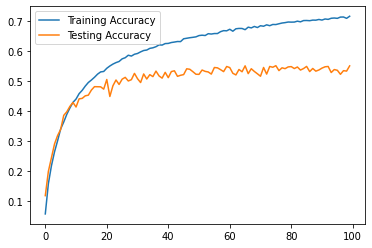

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])


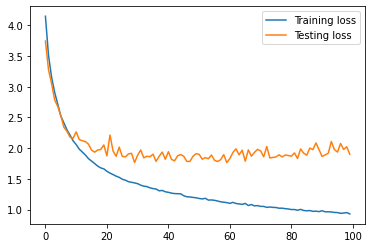

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.legend(['Training loss','Testing loss'])

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

input_shape=(32,32,3)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='elu', padding='same')(inputs)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='elu', padding='same')(x)

x = layers.Conv2D(32, 3, activation='elu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='elu', padding='same')(x)
x = layers.MaxPool2D((3,3))(x)

#Inception1


conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)

conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_2 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(conv_2)

conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)

conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(x)

x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)

# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)


# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)

# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception2

conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='relu')(conv_1)
conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(x)
conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='relu')(conv_2)

conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(x)

x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
# conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
# conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
# conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_1)
# conv_1 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_2 = layers.Conv2D(32, (1,7), padding='same', activation='elu')(conv_2)
# conv_2 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)


# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#Inception3
conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(conv_1)
conv_11 = layers.Conv2D(32, (1,3), padding='same', activation='elu')(conv_1)

conv_12 = layers.Conv2D(32, (7,1), padding='same', activation='relu')(conv_1)

conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
conv_21 = layers.Conv2D(32, (1,3), padding='same', activation='relu')(conv_2)

conv_22 = layers.Conv2D(32, (3,1), padding='same', activation='elu')(conv_2)

conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(conv_3)

conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='relu')(x)

x = layers.concatenate([conv_11,conv_12,conv_3,conv_4,conv_21,conv_22], axis=3)

# conv_1 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_1 = layers.Conv2D(32, (3,3), padding='same', activation='elu')(conv_1)
# conv_11 = layers.Conv2D(32, (1,3), padding='same', activation='elu')(conv_1)

# conv_12 = layers.Conv2D(32, (7,1), padding='same', activation='elu')(conv_1)

# conv_2 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)
# conv_21 = layers.Conv2D(32, (1,3), padding='same', activation='elu')(conv_2)

# conv_22 = layers.Conv2D(32, (3,1), padding='same', activation='elu')(conv_2)

# conv_3 = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)
# conv_3 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(conv_3)

# conv_4 = layers.Conv2D(32, (1,1), padding='same', activation='elu')(x)

# x = layers.concatenate([conv_1,conv_2,conv_3,conv_4], axis=3)

#end

# x = layers.MaxPool2D((3,3), strides=(1,1), padding='same')(x)



# x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.AveragePooling2D(4)(x)
x=layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(100, activation='softmax')(x)

inception_net_model = keras.Model(inputs, outputs)

inception_net_model.load_weights('../weights/inception_adam_noreg.hdf5')


y_pred=inception_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

Precision: 0.5669289691569261
Recall: 0.5517
Accuracy: 0.5517
